# Data Analysis of a weather history

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("dataset/weatherHistory.csv")

In [41]:
df.head(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [42]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [43]:
df["Formatted Date"] = pd.to_datetime(df["Formatted Date"], utc=True)
df.set_index("Formatted Date", inplace=True)

# Maybe find a correlation
## Plotting to see it visually

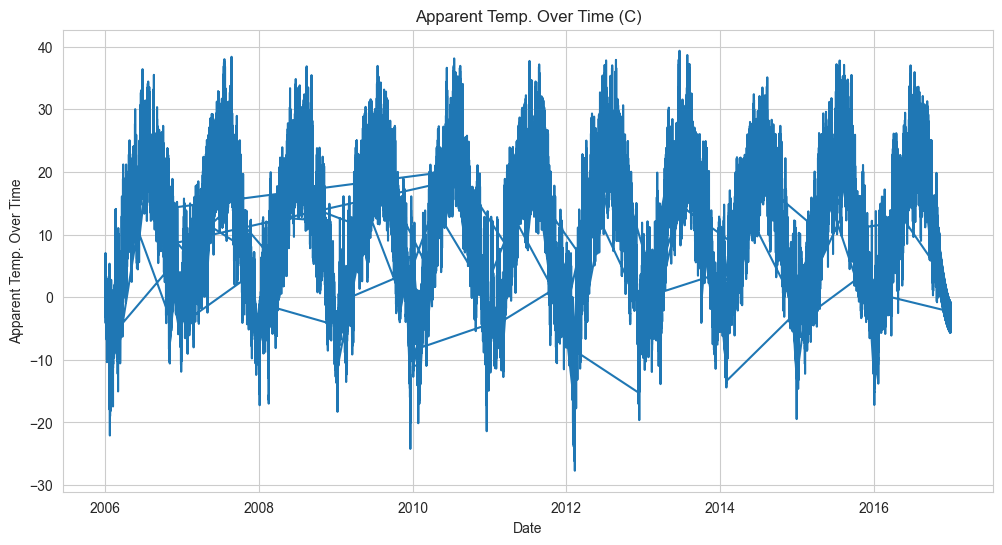

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Apparent Temperature (C)"])
plt.title("Apparent Temp. Over Time (C)")
plt.xlabel('Date')
plt.ylabel('Apparent Temp. Over Time')
plt.show()

# Missing Values per colum:

In [45]:
df.isnull().sum()

Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

## Value Count for Precip Type:

In [46]:
df["Precip Type"].value_counts()

Precip Type
rain    85224
snow    10712
Name: count, dtype: int64

## Fill missing values

In [47]:
df['Precip Type'].fillna(df['Precip Type'].mode()[0], inplace=True)

/var/folders/1r/ysm2tpz93jvd0lzhl73zsf180000gn/T/ipykernel_68854/2440293448.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Precip Type'].fillna(df['Precip Type'].mode()[0], inplace=True)


In [48]:
df.isnull().sum()

Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

# Resample data monthly to monthly averages to make the plot cleanear

/var/folders/1r/ysm2tpz93jvd0lzhl73zsf180000gn/T/ipykernel_68854/3150060658.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df[['Temperature (C)', 'Apparent Temperature (C)']].resample('M').mean()


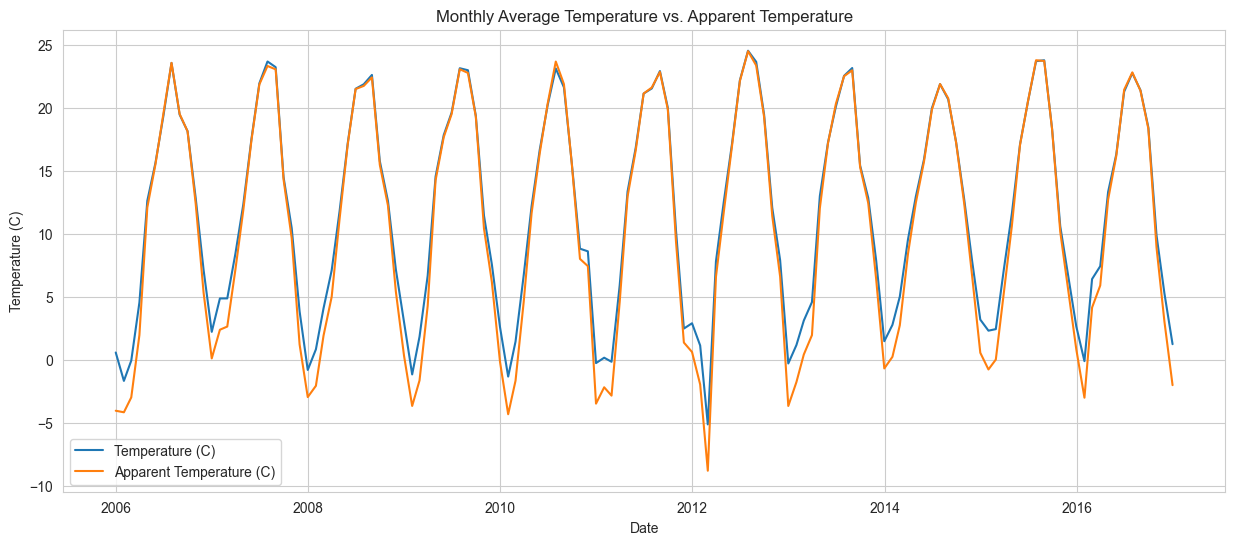

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 6))
df_monthly = df[['Temperature (C)', 'Apparent Temperature (C)']].resample('M').mean()
plt.plot(df_monthly.index, df_monthly['Temperature (C)'], label='Temperature (C)')
plt.plot(df_monthly.index, df_monthly['Apparent Temperature (C)'], label='Apparent Temperature (C)')
plt.title('Monthly Average Temperature vs. Apparent Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.legend()
plt.show()

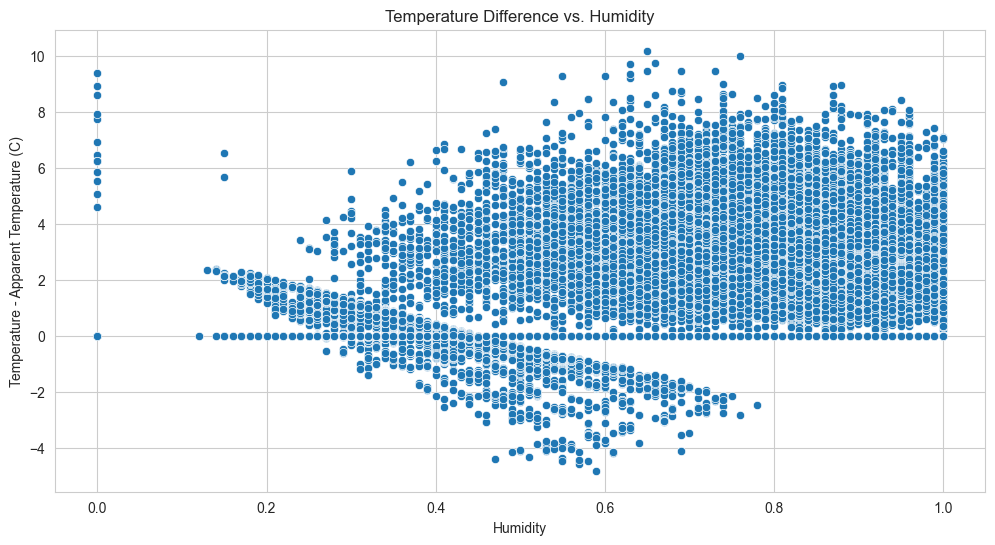

In [51]:
df["Temp Diff"] = df["Temperature (C)"] - df["Apparent Temperature (C)"]
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Humidity', y='Temp Diff', data=df)
plt.title('Temperature Difference vs. Humidity')
plt.xlabel('Humidity')
plt.ylabel('Temperature - Apparent Temperature (C)')
plt.show()

# Select only numeric columns for correlation

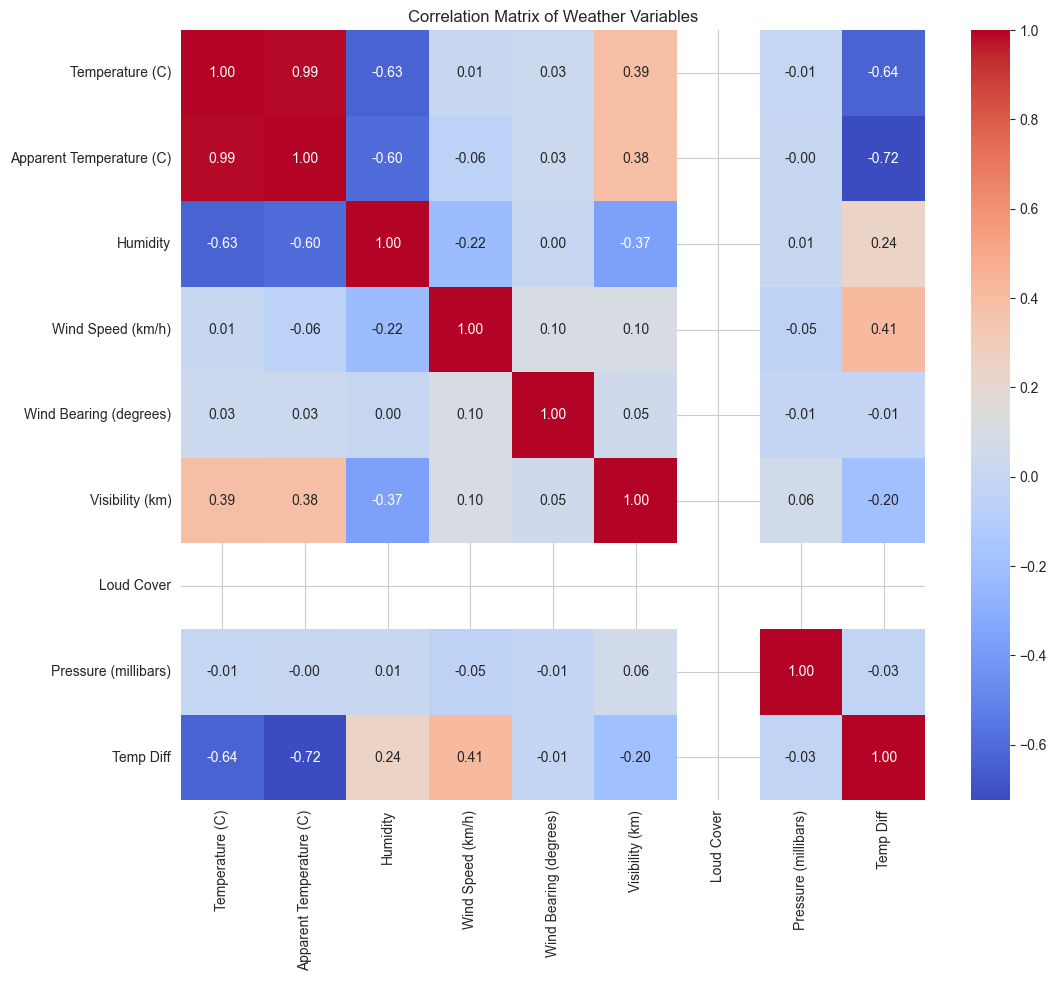

In [ ]:
plt.figure(figsize=(12, 10))
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Weather Variables')
plt.show()